In [4]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno

churn_test = pd.read_csv("../data/raw/test.csv")

# Churn Test EDA

This notebook explores the test dataset to understand its structure and distributions. Note: The test set does NOT have the Churn column, so we can only look at feature distributions without comparing to churn status.

## Basic Information

In [5]:
churn_test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Last Due Date,Last Payment Date,Customer Status
0,262106,65,Male,16.0,16,3,14,Standard,Monthly,853.00,4.0,06-21,07-05,active
1,37061,23,Male,NaN,12,3,6,Premium,Annual,860.00,21.0,06-03,06-09,active
2,361832,49,Male,NaN,25,2,4,Premium,Quarterly,905.58,15.0,06-13,06-17,active
3,425516,25,Female,48.0,11,7,16,Premium,Quarterly,446.00,8.0,06-14,06-30,active
4,60597,52,Female,4.0,10,6,3,Basic,Monthly,933.29,28.0,06-17,06-20,active


In [6]:
churn_test.shape

(133776, 14)

## Missing Values

In [7]:
churn_test.isna().sum().sort_values()

CustomerID               0
Age                      0
Gender                   0
Usage Frequency          0
Payment Delay            0
Subscription Type        0
Contract Length          0
Total Spend              0
Last Due Date            0
Last Payment Date        0
Customer Status          0
Last Interaction     27195
Tenure               27198
Support Calls        27538
dtype: int64

Columns "Tenure", "Support Calls", "Last Interaction", and "Payment Delay" all have missing values (same as training set)

<Axes: >

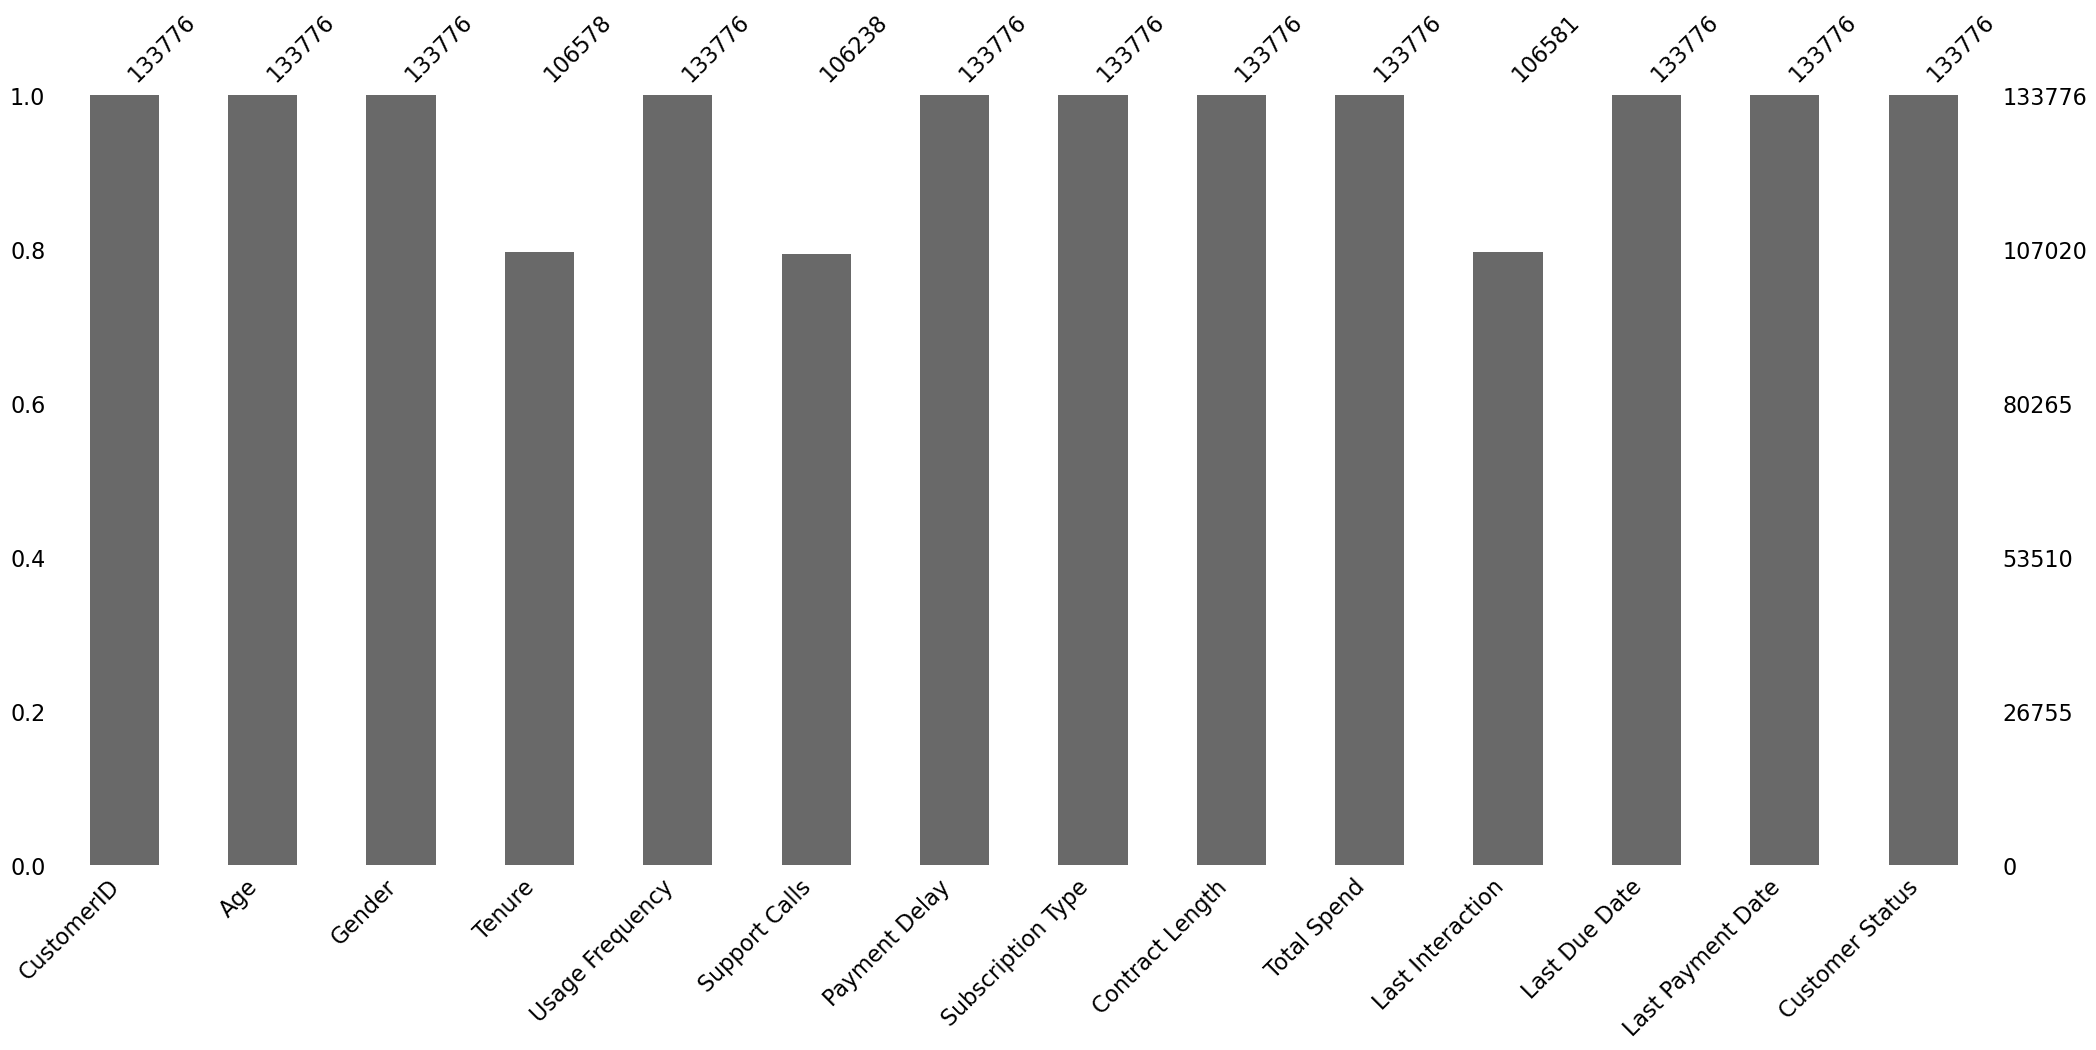

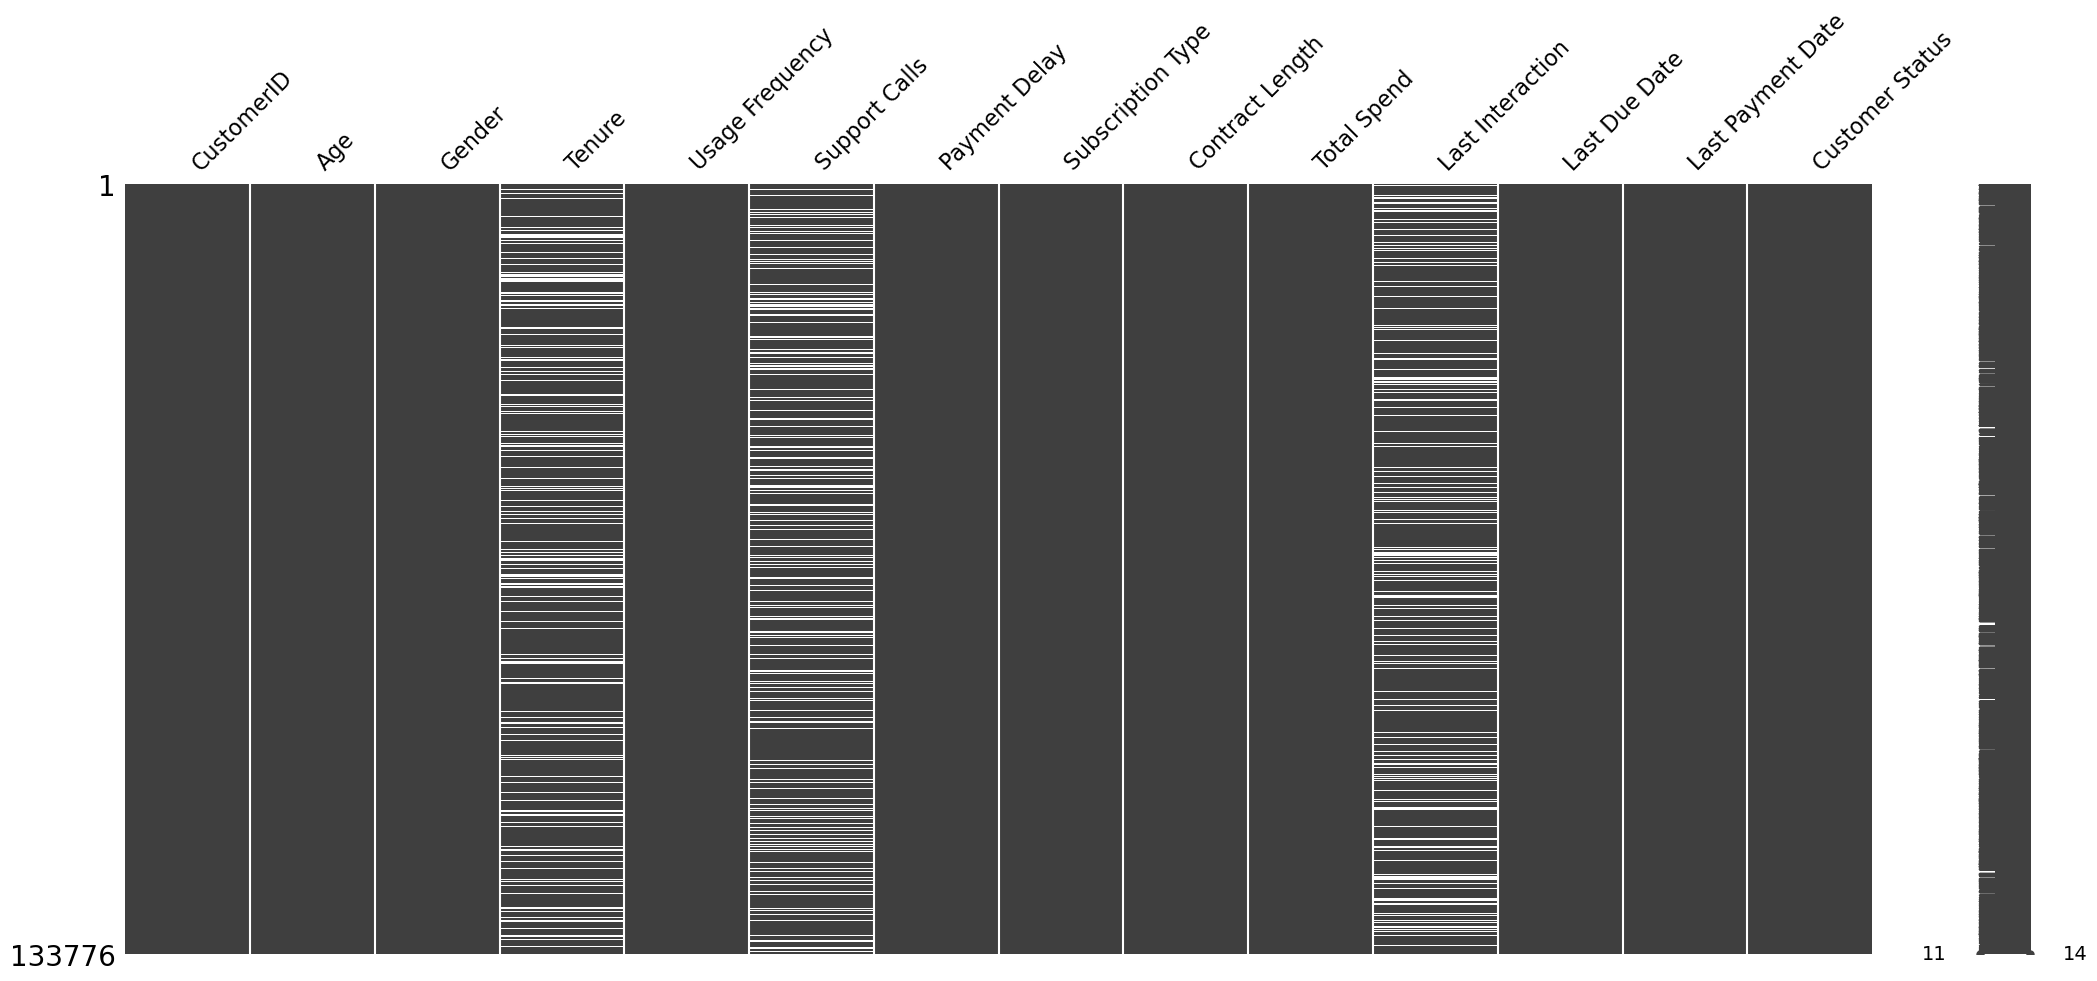

In [8]:
msno.bar(churn_test)       
msno.matrix(churn_test)

## Feature Distributions

Since the test set doesn't have the Churn column, we'll just look at the distributions of each feature.

### Age

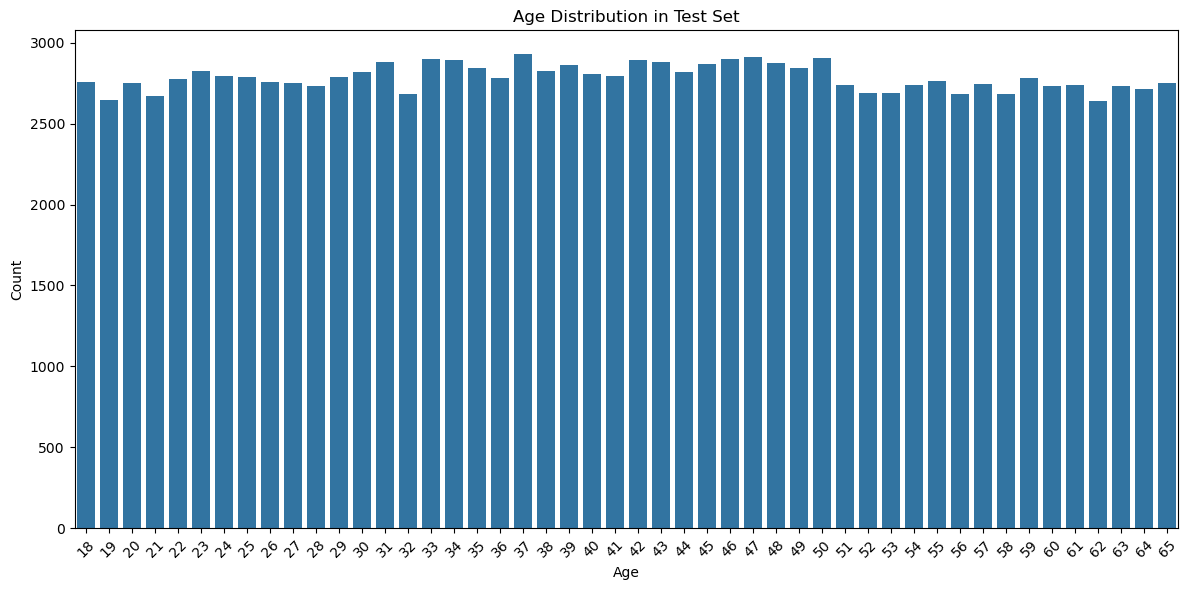

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(data=churn_test, x='Age', order=sorted(churn_test['Age'].unique()))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution in Test Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gender

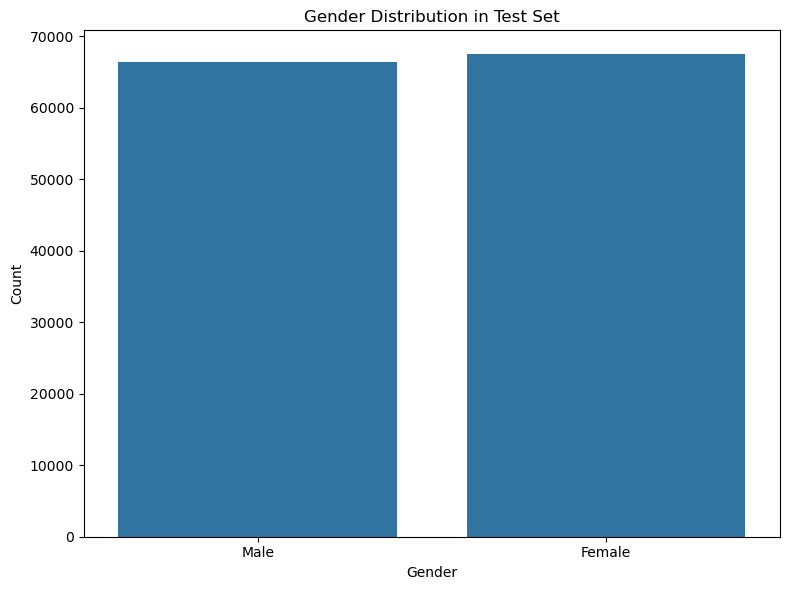

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=churn_test, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution in Test Set')
plt.tight_layout()
plt.show()

### Usage Frequency

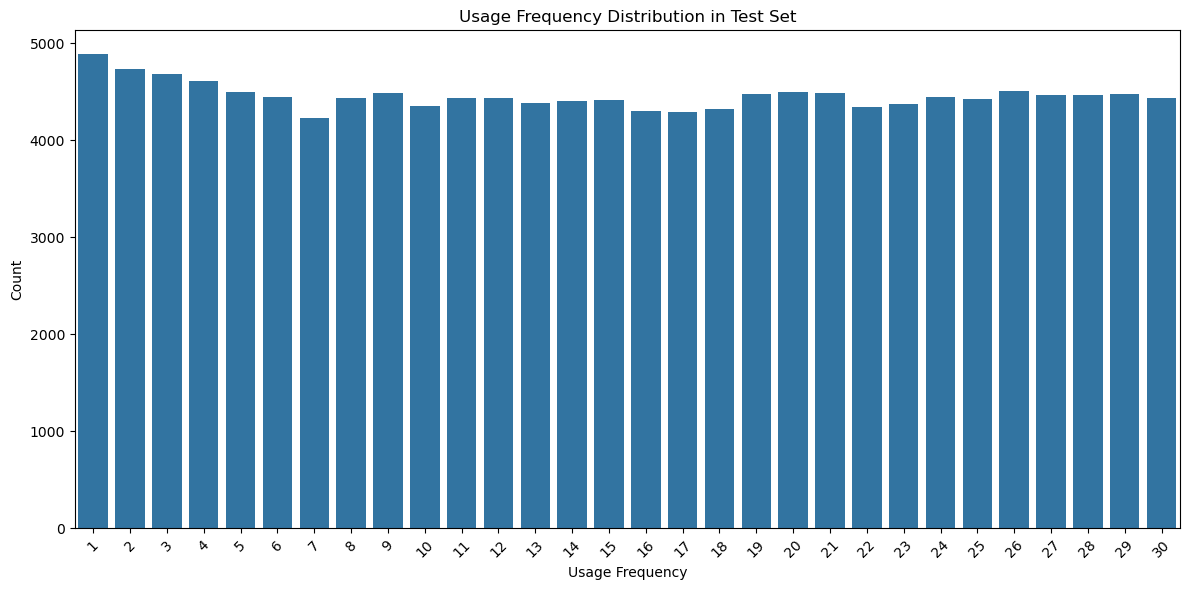

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=churn_test, x='Usage Frequency', order=sorted(churn_test['Usage Frequency'].unique()))
plt.xlabel('Usage Frequency')
plt.ylabel('Count')
plt.title('Usage Frequency Distribution in Test Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Subscription Type

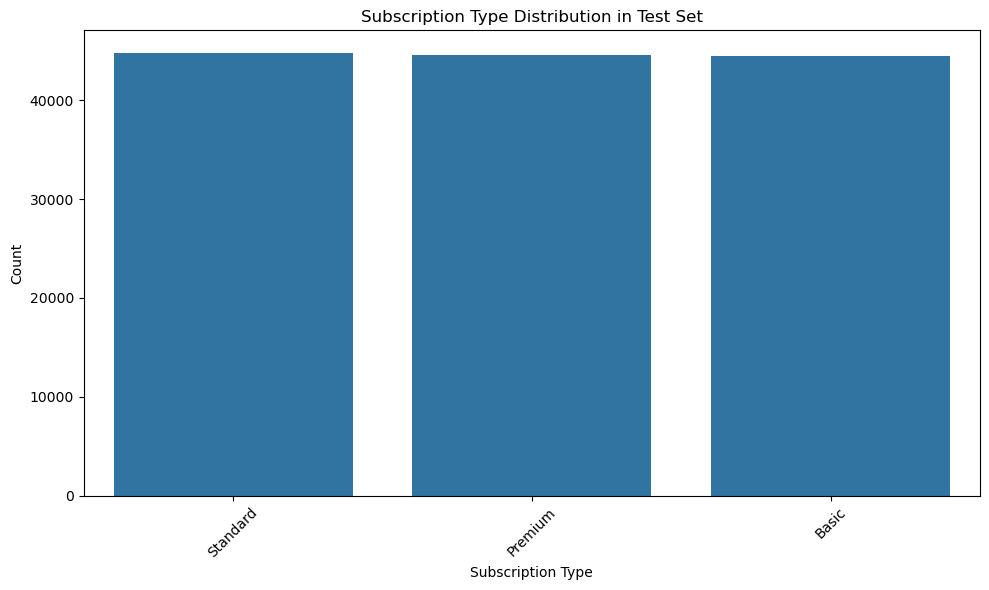

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_test, x='Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title('Subscription Type Distribution in Test Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Contract Length

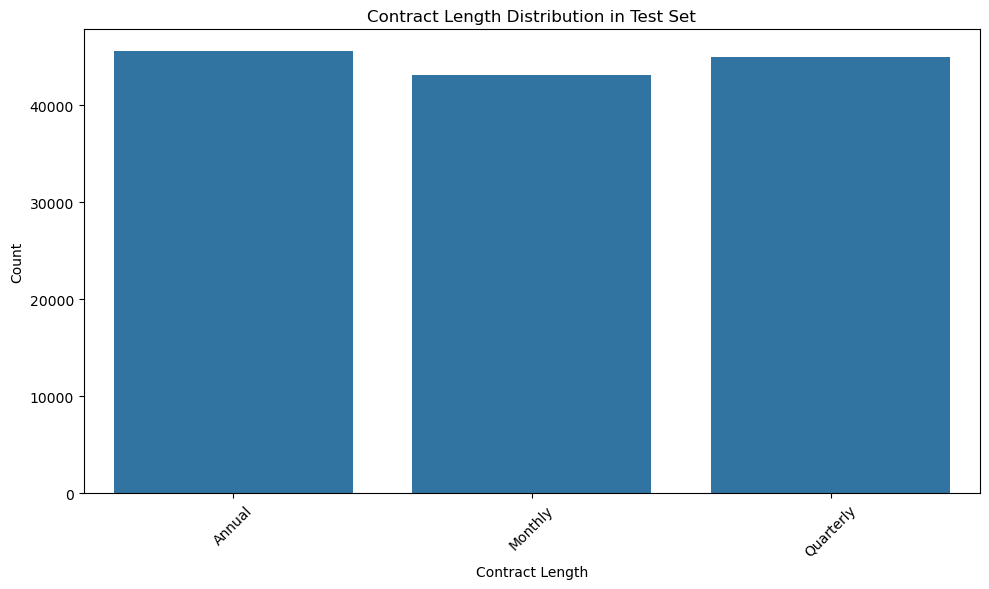

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_test, x='Contract Length', order=sorted(churn_test['Contract Length'].unique()))
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title('Contract Length Distribution in Test Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Total Spend

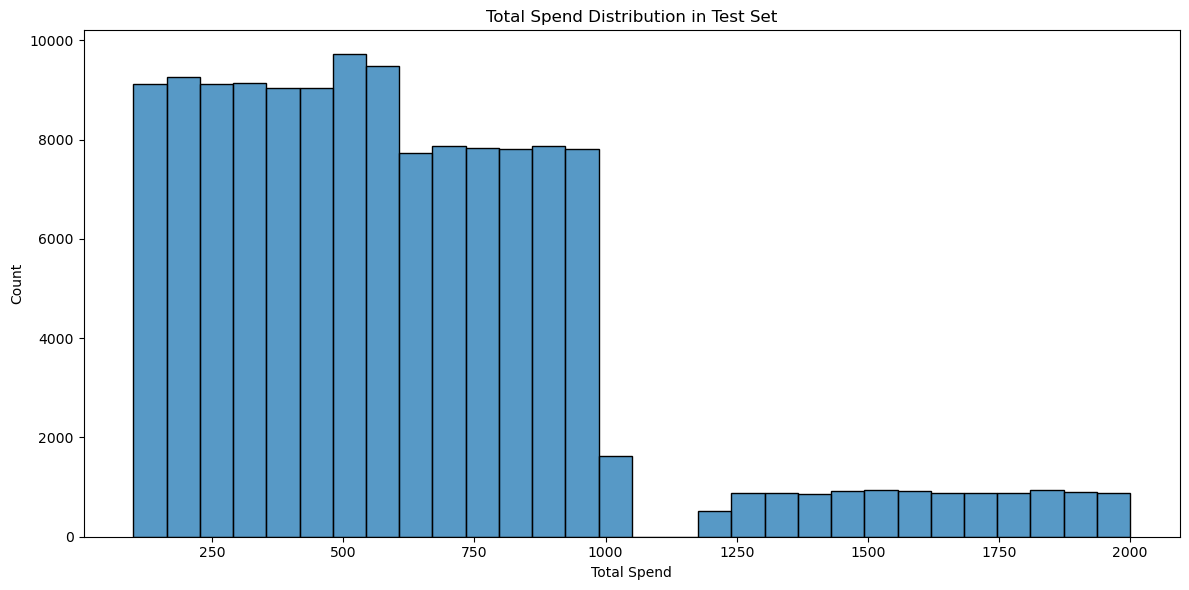

In [14]:
plt.figure(figsize=(12, 6))
sns.histplot(data=churn_test, x='Total Spend', bins=30)
plt.xlabel('Total Spend')
plt.ylabel('Count')
plt.title('Total Spend Distribution in Test Set')
plt.tight_layout()
plt.show()

### Customer Status

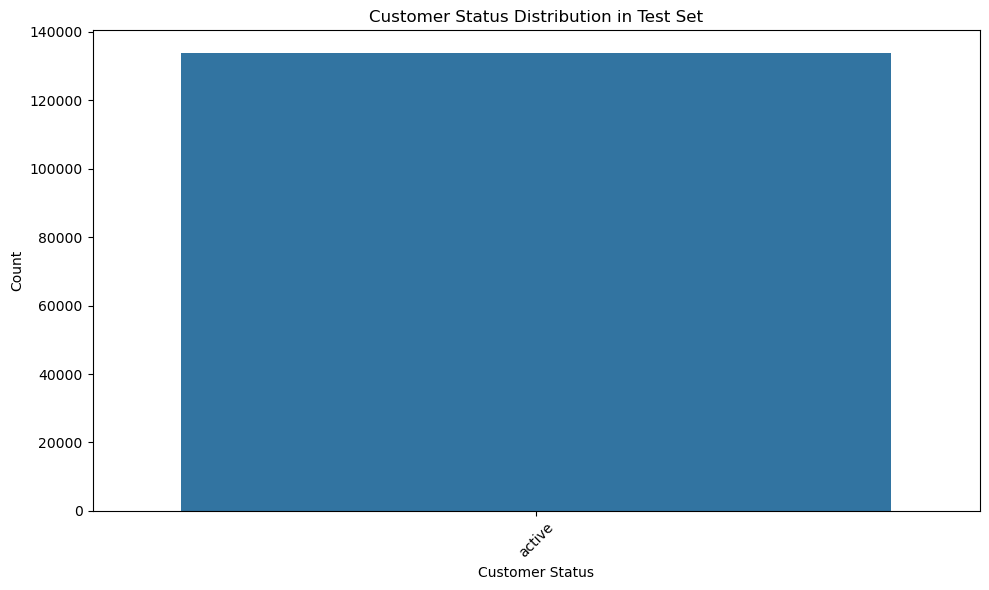

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=churn_test, x='Customer Status')
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Customer Status Distribution in Test Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
print(churn_test['Customer Status'].value_counts(normalize=True))

Customer Status
active    1.0
Name: proportion, dtype: float64


### Last Payment Date

0     07-05
1     06-09
2     06-17
3     06-30
4     06-20
5     06-27
6     06-16
7     06-27
8     07-02
9     07-14
10    07-13
11    07-16
12    07-06
13    07-22
14    06-27
15    07-04
16    07-24
17    07-19
18    07-03
19    06-15
Name: Last Payment Date, dtype: object


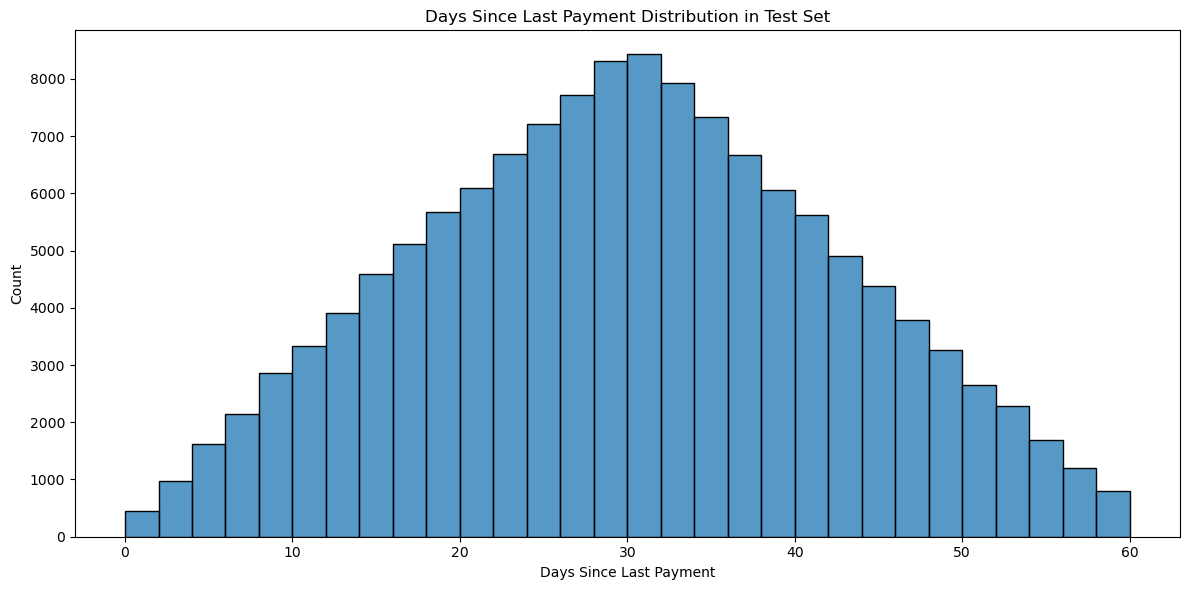

In [17]:
# Check the raw date format
print(churn_test['Last Payment Date'].head(20))

# Add year to the dates (assume 2024 or the current year)
churn_test['Last Payment Date'] = pd.to_datetime('2024-' + churn_test['Last Payment Date'].astype(str), 
                                                    format='%Y-%m-%d', 
                                                    errors='coerce')

# Calculate days since last payment (using max date as reference)
reference_date = churn_test['Last Payment Date'].max()
churn_test['Days_Since_Payment'] = (reference_date - churn_test['Last Payment Date']).dt.days

# Now plot
plt.figure(figsize=(12, 6))
plot_data = churn_test.dropna(subset=['Days_Since_Payment']).copy()

sns.histplot(data=plot_data, 
             x='Days_Since_Payment', 
             bins=30)
plt.xlabel('Days Since Last Payment')
plt.ylabel('Count')
plt.title('Days Since Last Payment Distribution in Test Set')
plt.tight_layout()
plt.show()

### Last Due Date

0     06-21
1     06-03
2     06-13
3     06-14
4     06-17
5     06-20
6     06-07
7     06-01
8     06-20
9     06-16
10    06-14
11    06-16
12    06-28
13    06-25
14    06-25
15    06-07
16    06-30
17    06-26
18    06-19
19    06-07
Name: Last Due Date, dtype: object


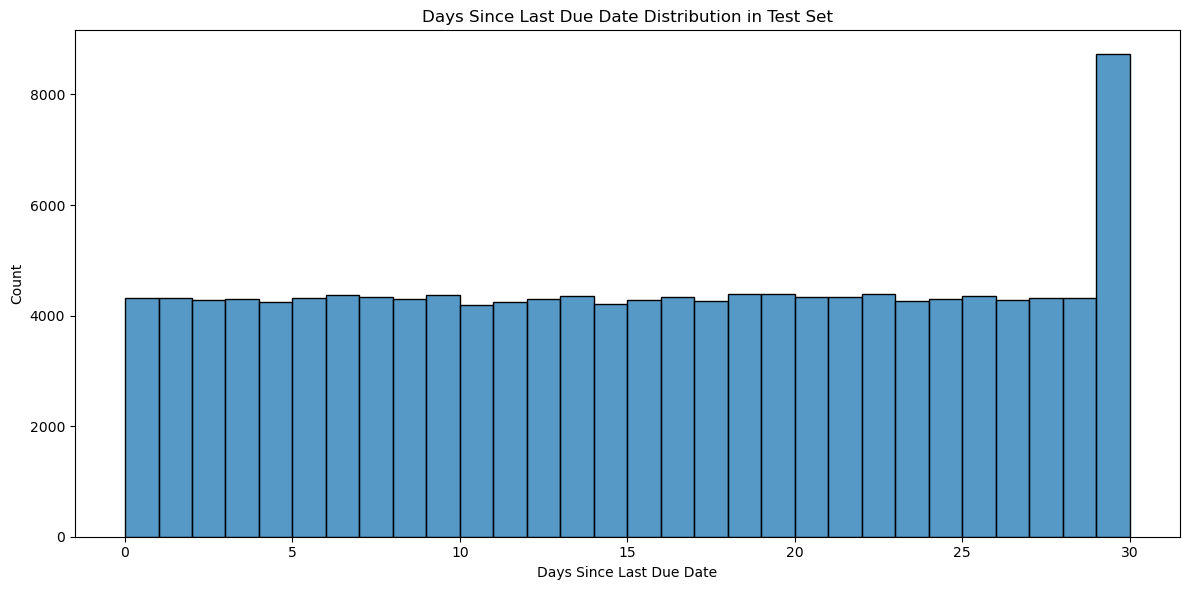

In [18]:
# Check the raw date format
print(churn_test['Last Due Date'].head(20))

# Add year to the dates (assume 2024 or the current year)
churn_test['Last Due Date'] = pd.to_datetime('2024-' + churn_test['Last Due Date'].astype(str), 
                                                format='%Y-%m-%d', 
                                                errors='coerce')

# Calculate days since last due date (using max date as reference)
reference_date = churn_test['Last Due Date'].max()
churn_test['Days_Since_Due'] = (reference_date - churn_test['Last Due Date']).dt.days

# Now plot
plt.figure(figsize=(12, 6))
plot_data = churn_test.dropna(subset=['Days_Since_Due']).copy()

sns.histplot(data=plot_data, 
             x='Days_Since_Due', 
             bins=30)
plt.xlabel('Days Since Last Due Date')
plt.ylabel('Count')
plt.title('Days Since Last Due Date Distribution in Test Set')
plt.tight_layout()
plt.show()